In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [143]:
original_dataset_dir = '/Users/Ruofan/Downloads/nutural_images'

In [231]:
import os
base_dir = '/Users/Ruofan/Downloads/datasets'
os.mkdir(base_dir)

In [50]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [52]:
train_flower_dir = os.path.join(train_dir, 'flower')
os.mkdir(train_flower_dir)

train_fruit_dir = os.path.join(train_dir, 'fruit')
os.mkdir(train_fruit_dir)

validation_flower_dir = os.path.join(validation_dir, 'flower')
os.mkdir(validation_flower_dir)

validation_fruit_dir = os.path.join(validation_dir, 'fruit')
os.mkdir(validation_fruit_dir)

test_flower_dir = os.path.join(test_dir, 'flower')
os.mkdir(test_flower_dir)

test_fruit_dir = os.path.join(test_dir, 'fruit')
os.mkdir(test_fruit_dir)

In [147]:
from tqdm import tqdm

In [221]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/Ruofan/Downloads/datasets'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 64
train_size = 800
val_size = 200
test_size = 200

In [222]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(3, 150, 150))
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in tqdm(generator):
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = np.transpose(features_batch, [0, 2, 3, 1])
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, train_size)
validation_features, validation_labels = extract_features(validation_dir, val_size)
test_features, test_labels = extract_features(test_dir, test_size)



  0%|          | 0/13 [00:00<?, ?it/s]

Found 800 images belonging to 2 classes.




  8%|▊         | 1/13 [00:17<03:25, 17.12s/it]

 15%|█▌        | 2/13 [00:33<03:07, 17.02s/it]

 23%|██▎       | 3/13 [00:51<02:52, 17.23s/it]

 31%|███       | 4/13 [01:08<02:34, 17.17s/it]

 38%|███▊      | 5/13 [01:25<02:16, 17.09s/it]

 46%|████▌     | 6/13 [01:41<01:57, 16.81s/it]

 54%|█████▍    | 7/13 [01:57<01:39, 16.53s/it]

 62%|██████▏   | 8/13 [02:14<01:22, 16.54s/it]

 69%|██████▉   | 9/13 [02:29<01:04, 16.21s/it]

 77%|███████▋  | 10/13 [02:45<00:48, 16.02s/it]

 85%|████████▍ | 11/13 [03:00<00:31, 15.84s/it]

 92%|█████████▏| 12/13 [03:16<00:15, 15.92s/it]


  0%|          | 0/4 [00:00<?, ?it/s]

Found 200 images belonging to 2 classes.





 25%|██▌       | 1/4 [00:16<00:49, 16.64s/it]


 50%|█████     | 2/4 [00:32<00:32, 16.48s/it]


 75%|███████▌  | 3/4 [00:49<00:16, 16.53s/it]



  0%|          | 0/4 [00:00<?, ?it/s]

Found 200 images belonging to 2 classes.






 25%|██▌       | 1/4 [00:17<00:51, 17.06s/it]



 50%|█████     | 2/4 [00:32<00:32, 16.48s/it]



 75%|███████▌  | 3/4 [00:47<00:16, 16.12s/it]

In [225]:
train_features = np.reshape(train_features, (train_size, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (val_size, 4 * 4 * 512))
test_features = np.reshape(test_features, (test_size, 4 * 4 * 512))

In [226]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [227]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features, validation_labels))

Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4703 - acc: 0.8013 - val_loss: 0.2343 - val_acc: 0.9900
Epoch 2/30
800/800 [==============================] - 0s 311us/step - loss: 0.2146 - acc: 0.9563 - val_loss: 0.1355 - val_acc: 0.9950
Epoch 3/30
800/800 [==============================] - 0s 302us/step - loss: 0.1355 - acc: 0.9800 - val_loss: 0.0864 - val_acc: 0.9950
Epoch 4/30
800/800 [==============================] - 0s 299us/step - loss: 0.0950 - acc: 0.9825 - val_loss: 0.0602 - val_acc: 0.9950
Epoch 5/30
800/800 [==============================] - 0s 305us/step - loss: 0.0628 - acc: 0.9950 - val_loss: 0.0444 - val_acc: 0.9950
Epoch 6/30
800/800 [==============================] - 0s 303us/step - loss: 0.0461 - acc: 0.9937 - val_loss: 0.0346 - val_acc: 0.9950
Epoch 7/30
800/800 [==============================] - 0s 326us/step - loss: 0.0366 - acc: 0.9913 - val_loss: 0.0273 - val_acc: 0.9950
Epoch 8/30
800/800

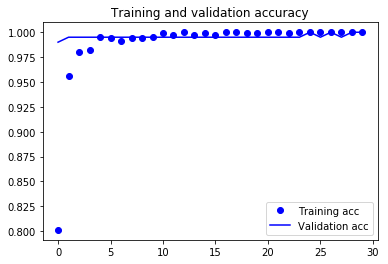

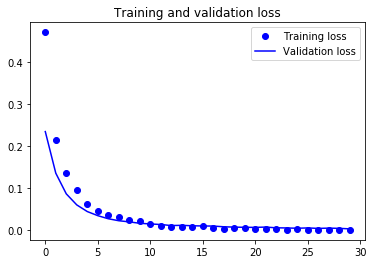

In [258]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [188]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [190]:
from keras import backend as K
from keras.layers import Input
input_img = Input([3, 150, 150])

In [196]:
input_layer = layer_dict['input_8']

In [199]:
input_img = input_layer.get_input_at(0)

In [254]:
layer_name = 'block4_conv3'
filter_index = 1  

layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, input_img)[0]

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([input_img], [loss, grads])

In [255]:
import numpy as np

input_img_data = np.random.random((1, 3, 150, 150)) * 20 + 128.
step = 1e0

for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [256]:
from scipy.misc import imsave
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [241]:
from PIL import Image

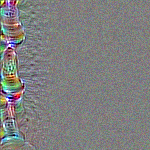

In [257]:
Image.open('%s_filter_%d.png' % (layer_name, filter_index))

In [259]:
from keras.applications import inception_v3
from keras import backend as K
K.set_learning_phase(0)

model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)

In [260]:
model = applications.VGG19(include_top=False,
                           weights='imagenet')